In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2 as cv
import skimage
from skimage import data, io, filters, exposure
from skimage.color import rgb2gray
from skimage import feature
from skimage import measure
import random as rng

from dice_counter import *

## Wkyrywanie liczby oczek w kostkach 
### Piotr Derenowski
### Mateusz Klaczyński 

Tematem projektu bla bla bla

1. Proces wykrywania zaczynam od wczytania zdjęcia biblioteką opencv zmianie rozdzielczości zdjęcia oraz nałożenia filtra szarości na zdjęcie  

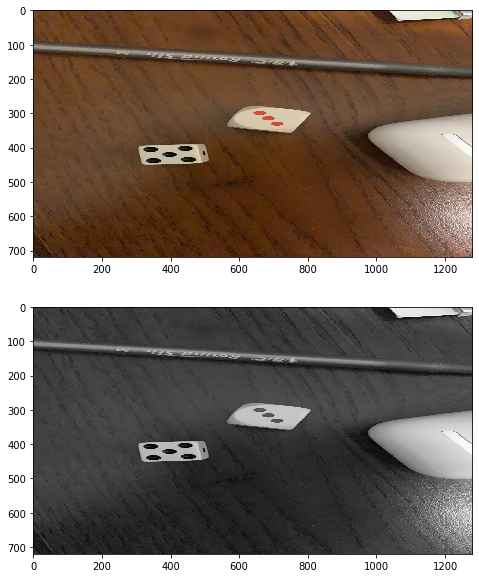

In [11]:
image = cv.imread("airpodsy.png")
image = cv.resize(image, (1280, 720))
bw_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 1, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
fig.add_subplot(2, 1, 2)
plt.imshow(bw_image, cmap="binary_r")
plt.show()

2. Definujemy funkcję która usuwa ze zdjęcia wszystko co jest poniżej średniej + mediany wartości pikseli zdjęcia 

In [15]:
def remove_everything_below_std_and_mean(image):
    treshold = round(np.std(image) + np.mean(image))
    return np.array((image > treshold) * 255, dtype=np.uint8)

Efekt funkcji 

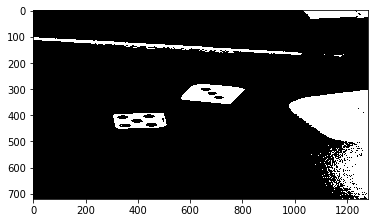

In [18]:
filtered = remove_everything_below_std_and_mean(bw_image)
plt.imshow(filtered, cmap="binary_r")
plt.show()

Następnie używamy wbudowanej w opencv funkcji erode by powiększyć miejsca zaineteresowania pozbyć się szumu który występuje obok siebie, nakładamy dwie iteracje

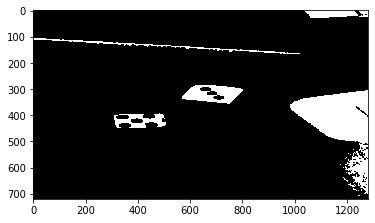

In [22]:
kernel = np.ones((3,3), np.uint8)
eroded = cv.erode(filtered, kernel, iterations=2)
plt.imshow(eroded, cmap="binary_r")
plt.show()